# Import Librarys

In [2]:
pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import joblib

# Column Descriptions


* **Hours_Studied**	Number of hours spent studying per week.
*	**Attendance** Percentage of classes attended.
* **Parental_Involvement**	Level of parental involvement in the student's education (Low, Medium, High).
* **Access_to_Resources**	Availability of educational resources (Low, Medium, High).
* **Extracurricular_Activities**	Participation in extracurricular activities (Yes, No).
* **Sleep_Hours**	Average number of hours of sleep per night.
* **Previous_Scores**	Scores from previous exams.
* **Motivation_Level**	Student's level of motivation (Low, Medium, High).
* **Internet_Access**	Availability of internet access (Yes, No).
* **Tutoring_Sessions**	Number of tutoring sessions attended per month.
* **Family_Income**	Family income level (Low, Medium, High).
* **Teacher_Quality**	Quality of the teachers (Low, Medium, High).
* **School_Type**	Type of school attended (Public, Private).
* **Peer_Influence**	Influence of peers on academic performance (Positive, Neutral, Negative).
* **Physical_Activity**	Average number of hours of physical activity per week.
* **Learning_Disabilities**	Presence of learning disabilities (Yes, No).
* **Parental_Education_Level**	Highest education level of parents (High School, College, Postgraduate).
* **Distance_from_Home**	Distance from home to school (Near, Moderate, Far).
* **Gender**	Gender of the student (Male, Female).
* **Exam_Score**	Final exam score.

# Clean data


In [4]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Missing data

In [6]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace=True)
df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12968\4006623996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12968\4006623996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

# Duplicates

In [8]:
df.duplicated().sum()

0

# Description of data

In [9]:
categorical_columns = df.columns[df.dtypes == 'object']
print("                                   \"Value Counts Of Categorical Data\" \n")
for column in categorical_columns:
    print(df[column].value_counts())
    print("-----------------------------------------------------------------------------------")

                                   "Value Counts Of Categorical Data" 

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
-----------------------------------------------------------------------------------
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
-----------------------------------------------------------------------------------
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
-----------------------------------------------------------------------------------
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
-----------------------------------------------------------------------------------
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
-----------------------------------------------------------------------------------
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
---------

In [10]:
print("describe the numeric data \n")
df.describe().T

describe the numeric data 



,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


The dataset contains a student whose score is 101.

In [11]:
df[df['Exam_Score'] == 101]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [12]:
index_to_drop = df[df['Exam_Score'] == 101].index
df.drop(index_to_drop, inplace=True)

# Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_12968\2868089848.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_12968\2868089848.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_12968\2868089848.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_12968\2868089848.py:13: FutureWarning: 

Passing `palette` withou

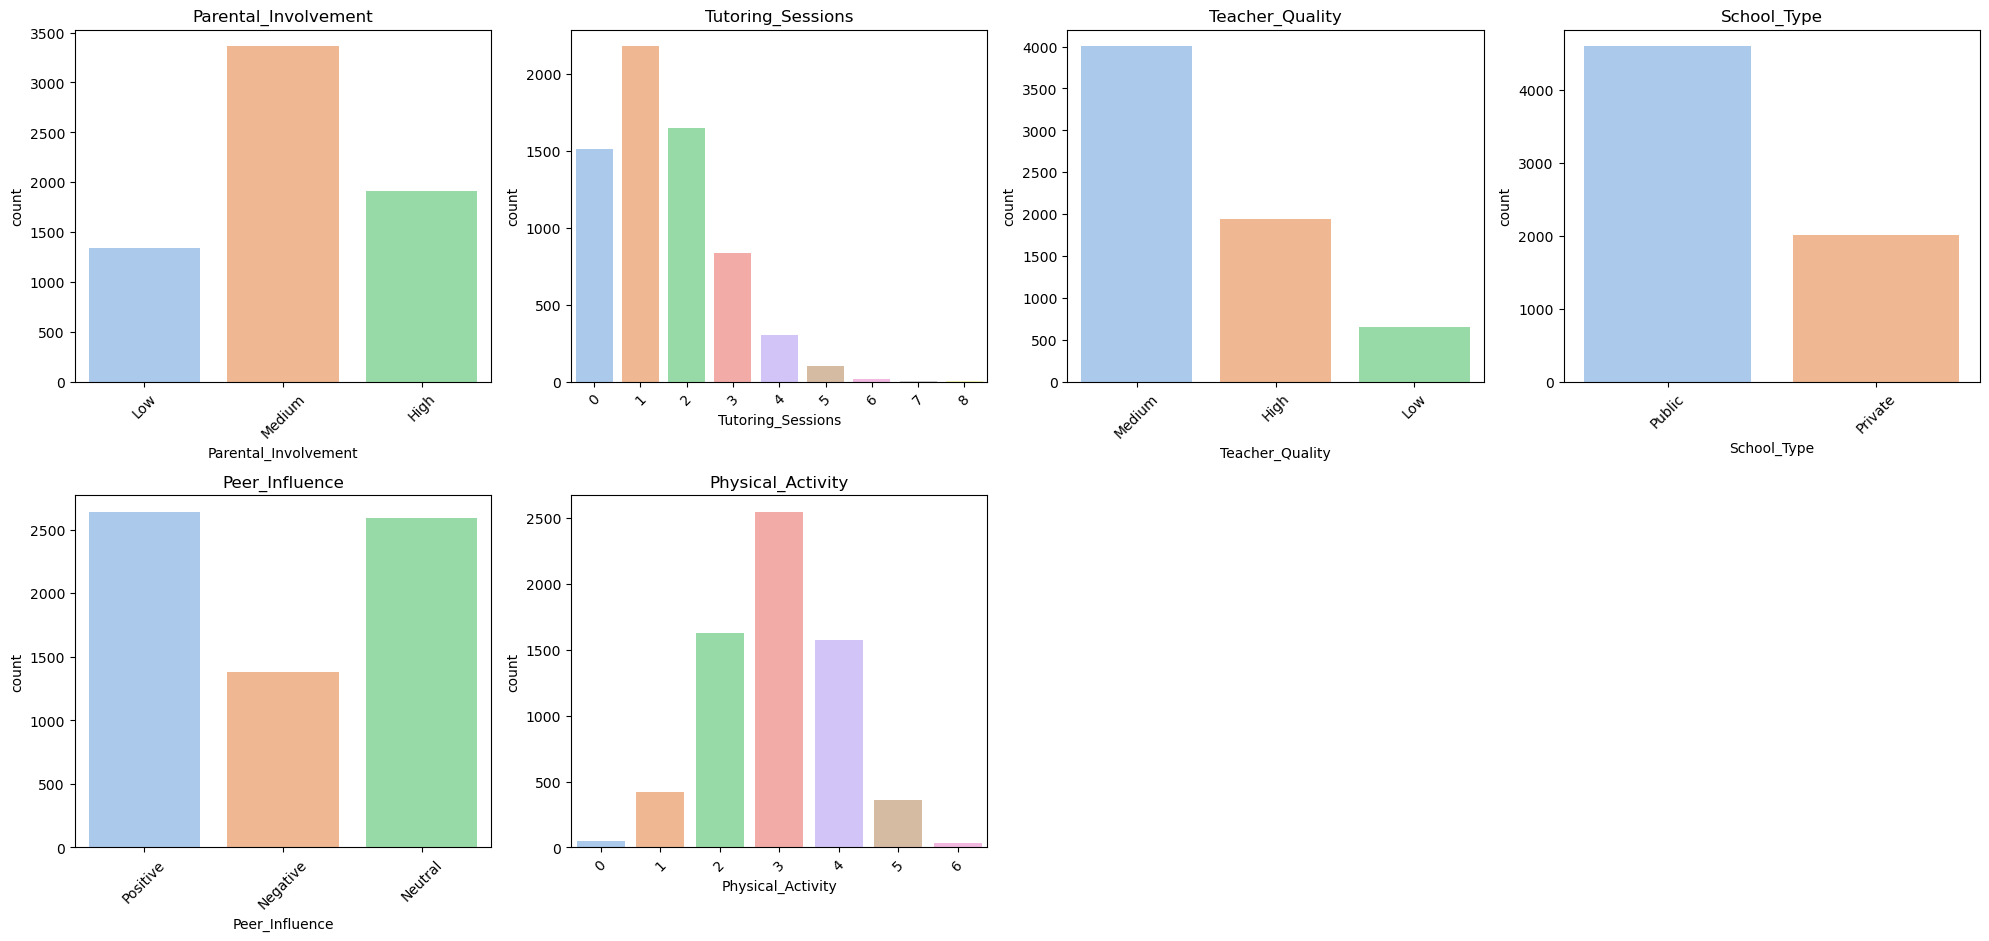

In [13]:
categorical_features_count = [
    'Parental_Involvement', 'Tutoring_Sessions', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Physical_Activity',
]

rows = 4
cols = 4

plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_features_count, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'{col}', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


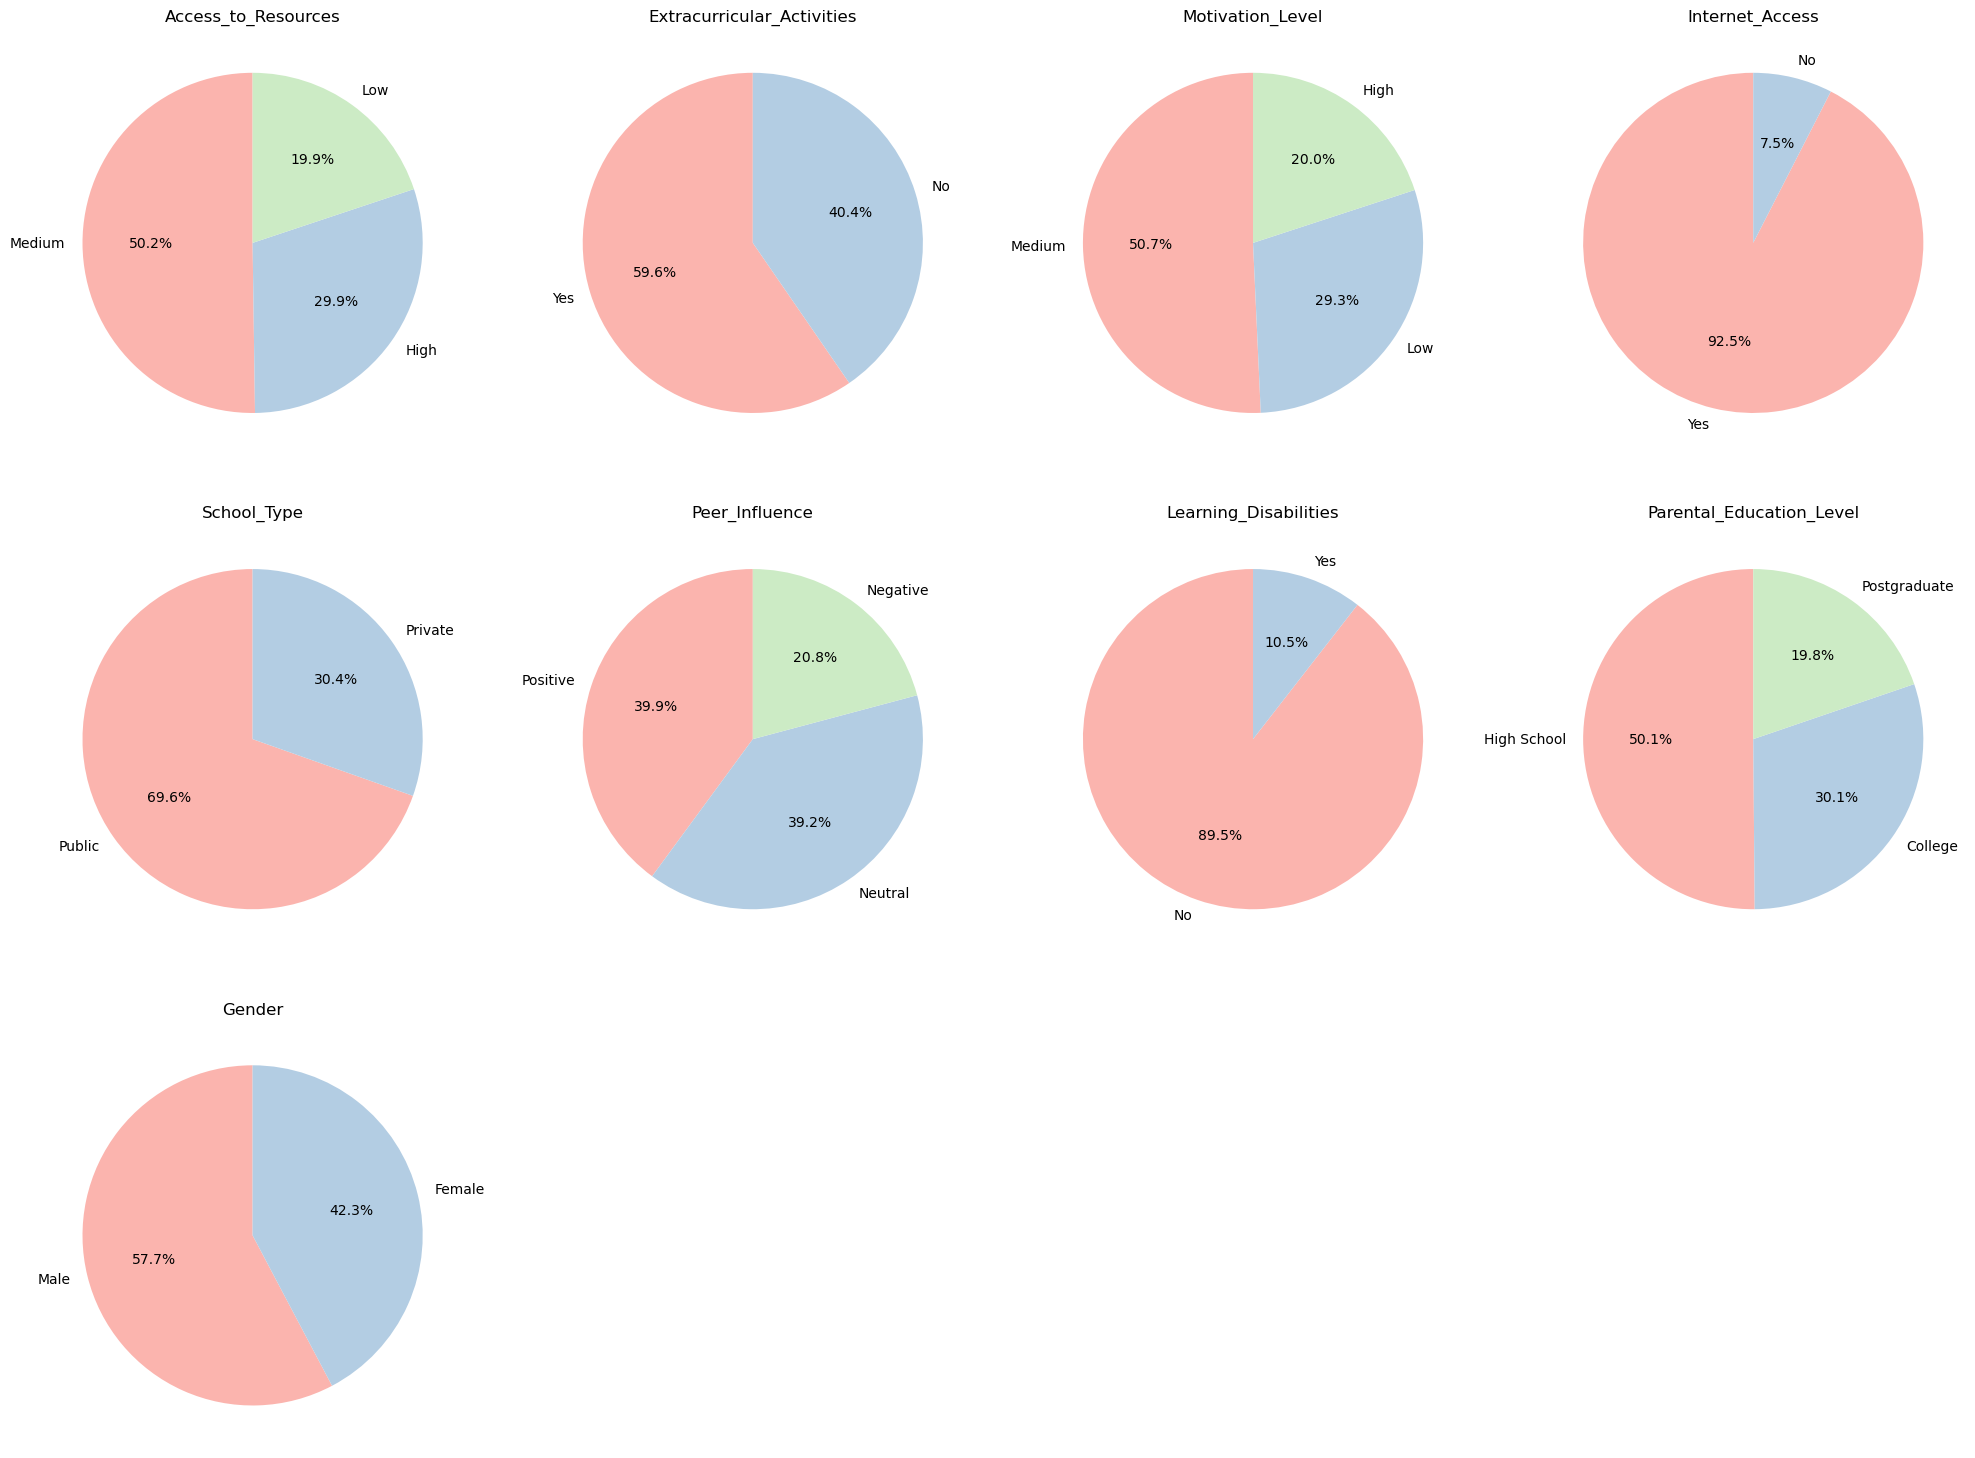

In [14]:
categorical_features_pie = [
    'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Gender'
]

rows = 4
cols = 4

plt.figure(figsize=(20, 20))

for i, col in enumerate(categorical_features_pie, 1):
    plt.subplot(rows, cols, i)
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        colors=plt.cm.Pastel1.colors,
        startangle=90
    )
    plt.title(f'{col}', fontsize=12)
    plt.ylabel('')

plt.tight_layout()
plt.show()

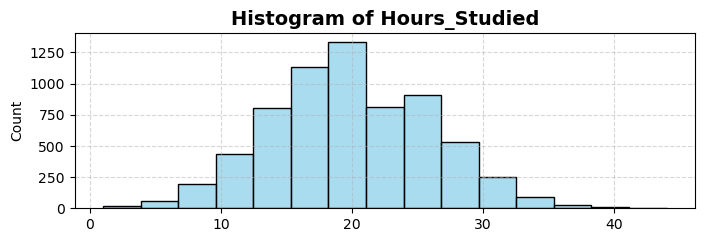

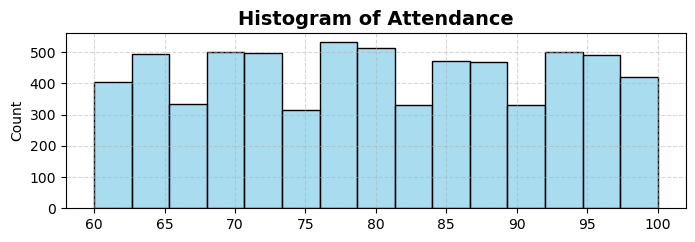

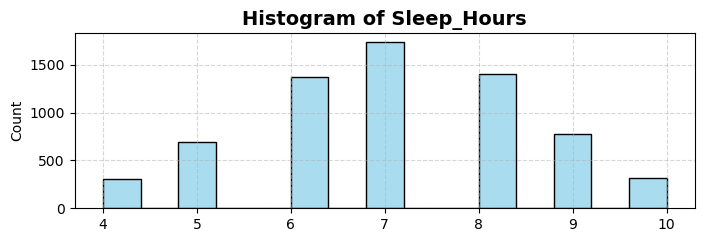

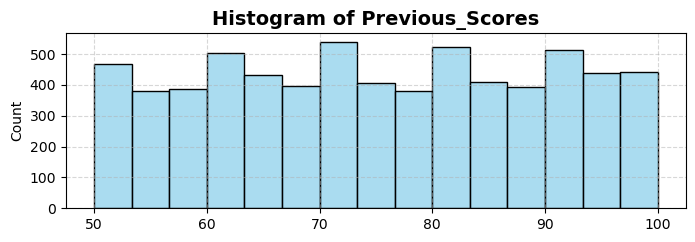

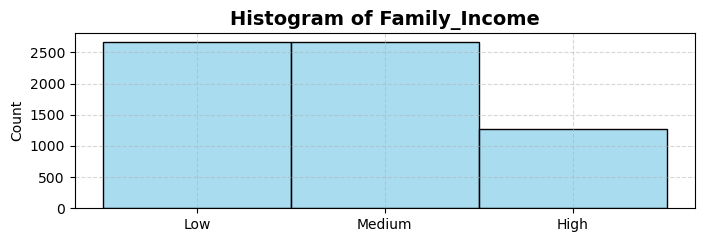

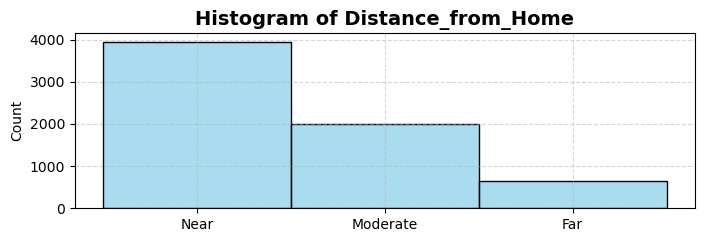

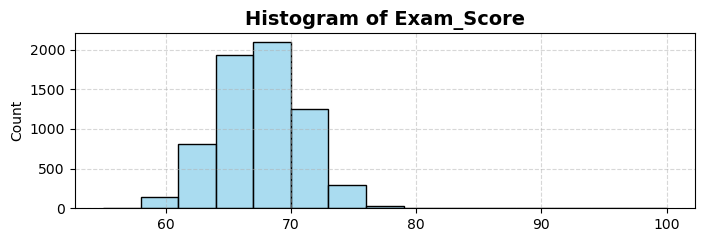

In [15]:
numeric_features = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Family_Income',
    'Distance_from_Home', 'Exam_Score'
]

for col in numeric_features:
    plt.figure(figsize=(8, 5))

    # Histogram
    plt.subplot(2, 1, 1)
    sns.histplot(df[col], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Boxplot


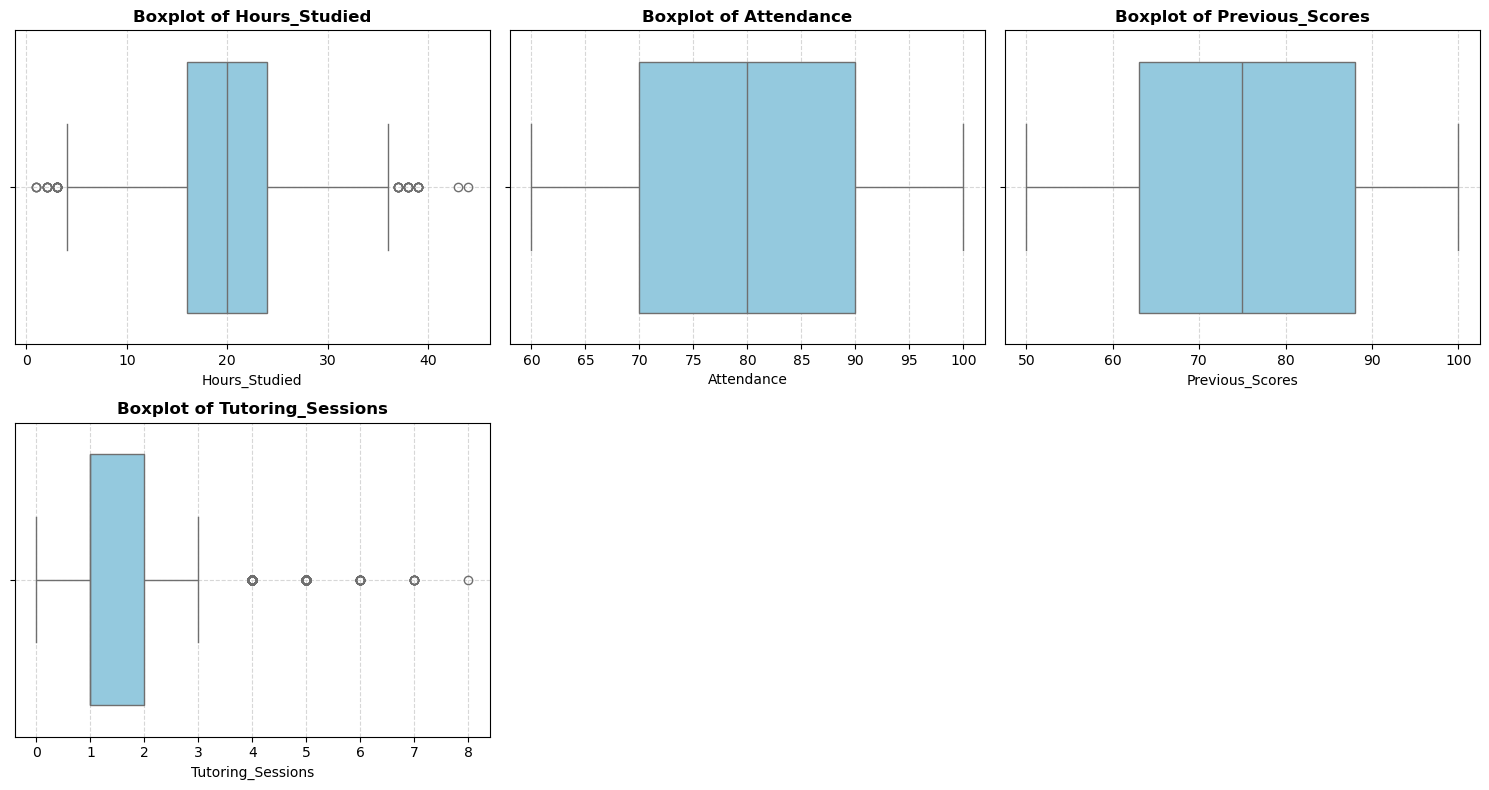

In [16]:
# List of numerical columns
numerical_cols = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']

# Automatically calculate rows and columns
n_cols = 3  # plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col}", fontsize=12, fontweight='bold')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


outlier for target

Removing outliers from Training data

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_indices = set()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices.update(outliers)

num_outliers = len(outlier_indices)
total_rows = len(df)

percentage_outliers = (num_outliers / total_rows) * 100

print(f"Outliers: {num_outliers} rows")
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

df = df.drop(index=outlier_indices).reset_index(drop=True)


Outliers: 552 rows
Percentage of outliers: 8.36%


Correlation Analysis: Use a heatmap to detect correlations between features and the target variable.

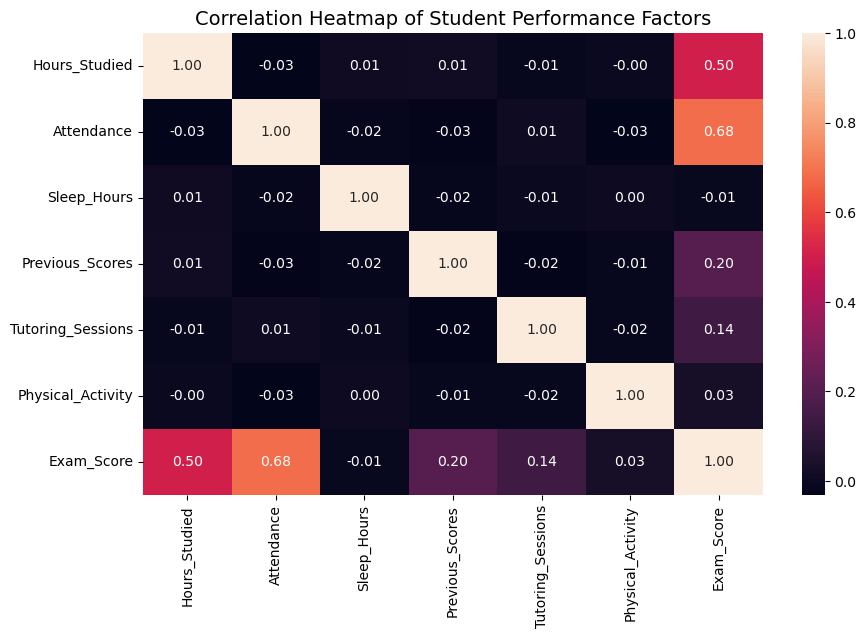

In [18]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Student Performance Factors", fontsize=14)
plt.show()

# Feature Engineering
Handling numerical features based on correlations

In [19]:
df.drop(['Sleep_Hours','Physical_Activity'],axis=1,inplace=True)

Handling Categorical Features based on hypothesis testing

In [20]:
categorical_cols = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Internet_Access', 'School_Type', 'Parental_Education_Level',
    'Learning_Disabilities', 'Motivation_Level',
    'Peer_Influence', 'Gender', 'Family_Income',
    'Peer_Influence','Distance_from_Home','Teacher_Quality'
]

results = {"Feature": [], "P-value": [], "Significant": []}

for col in categorical_cols:
    table = pd.crosstab(df[col], df['Exam_Score'])
    chi2, p, dof, exp = chi2_contingency(table)

    results["Feature"].append(col)
    results["P-value"].append(p)
    results["Significant"].append("Yes" if p < 0.05 else "No")

chi_df = pd.DataFrame(results)

chi_df

,Feature,P-value,Significant
0,Parental_Involvement,1.348619e-31,Yes
1,Access_to_Resources,1.835413e-35,Yes
2,Extracurricular_Activities,4.594536e-05,Yes
3,Internet_Access,1.395471e-03,Yes
4,School_Type,7.217890e-01,No
5,Parental_Education_Level,2.644142e-12,Yes
6,Learning_Disabilities,3.949120e-14,Yes
7,Motivation_Level,2.574406e-06,Yes
8,Peer_Influence,8.894266e-13,Yes
9,Gender,8.952998e-02,No


In [21]:
df.drop(chi_df[chi_df["Significant"] == "No"]["Feature"].tolist(),axis=1,inplace=True)

# Build Model

Split Data


In [22]:
x = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature Columns

In [23]:
numeric_cols = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']

ordinal_cols = [
    'Parental_Involvement', 'Access_to_Resources',
    'Parental_Education_Level', 'Motivation_Level',
    'Peer_Influence', 'Family_Income',
    'Distance_from_Home','Teacher_Quality'
]

categorical_cols = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']

Preprocessor

In [24]:
numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler())
])

ordinal_transformer = OrdinalEncoder()

categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

Models

In [25]:
models = {
    'LinearRegression': LinearRegression(),
    'PolynomialRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror'),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
}

Param Grids

In [26]:
param_grids = {
    'LinearRegression': {},

    'PolynomialRegression': {
        'preprocessor__num__poly__degree': [2, 3]
    },

    'RandomForest': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [None, 5, 10],
        'regressor__min_samples_split': [2, 5]
    },

    'XGBoost': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.1]
    },

    'SVR': {
        'regressor__C': [0.1, 1, 10],
        'regressor__gamma': ['scale', 'auto'],
        'regressor__kernel': ['rbf', 'linear']
    },

    'KNN': {
        'regressor__n_neighbors': [3, 5, 7],
        'regressor__weights': ['uniform', 'distance']
    }
}

GridSearch Loop

In [27]:
best_models = {}
results_list = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    grid = GridSearchCV(pipe, param_grids[name], cv=3,
                        n_jobs=-1, scoring='r2')

    grid.fit(x_train, y_train)

    best_models[name] = grid

    print(f"==== {name} ====")
    print("Best Params:", grid.best_params_)
    print("Best Train R2:", grid.best_score_)
    print("Test R2:", grid.score(x_test, y_test))
    print("\n")

    results_list.append({
        "Model": name,
        "Best Train R²": grid.best_score_,
        "Test R²": grid.score(x_test, y_test),
        "Best Params": grid.best_params_
    })

==== LinearRegression ====
Best Params: {}
Best Train R2: 0.8788841677531822
Test R2: 0.8693046372190766


==== PolynomialRegression ====
Best Params: {'preprocessor__num__poly__degree': 2}
Best Train R2: 0.8788841677531822
Test R2: 0.8693046372190766


==== RandomForest ====
Best Params: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best Train R2: 0.876201102179954
Test R2: 0.8686689162458072


==== XGBoost ====
Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Best Train R2: 0.9685144683432755
Test R2: 0.9680990664575618


==== SVR ====
Best Params: {'regressor__C': 10, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'}
Best Train R2: 0.9741764468319193
Test R2: 0.9752495858244262


==== KNN ====
Best Params: {'regressor__n_neighbors': 7, 'regressor__weights': 'distance'}
Best Train R2: 0.8128773035705551
Test R2: 0.8110482443854764




In [28]:
results_df = pd.DataFrame(results_list)
results_df.head()

,Model,Best Train R²,Test R²,Best Params
0,LinearRegression,0.878884,0.869305,{}
1,PolynomialRegression,0.878884,0.869305,{'preprocessor__num__poly__degree': 2}
2,RandomForest,0.876201,0.868669,"{'regressor__max_depth': None, 'regressor__min..."
3,XGBoost,0.968514,0.968099,"{'regressor__learning_rate': 0.1, 'regressor__..."
4,SVR,0.974176,0.975250,"{'regressor__C': 10, 'regressor__gamma': 'scal..."



🔥 Best Model is: SVR


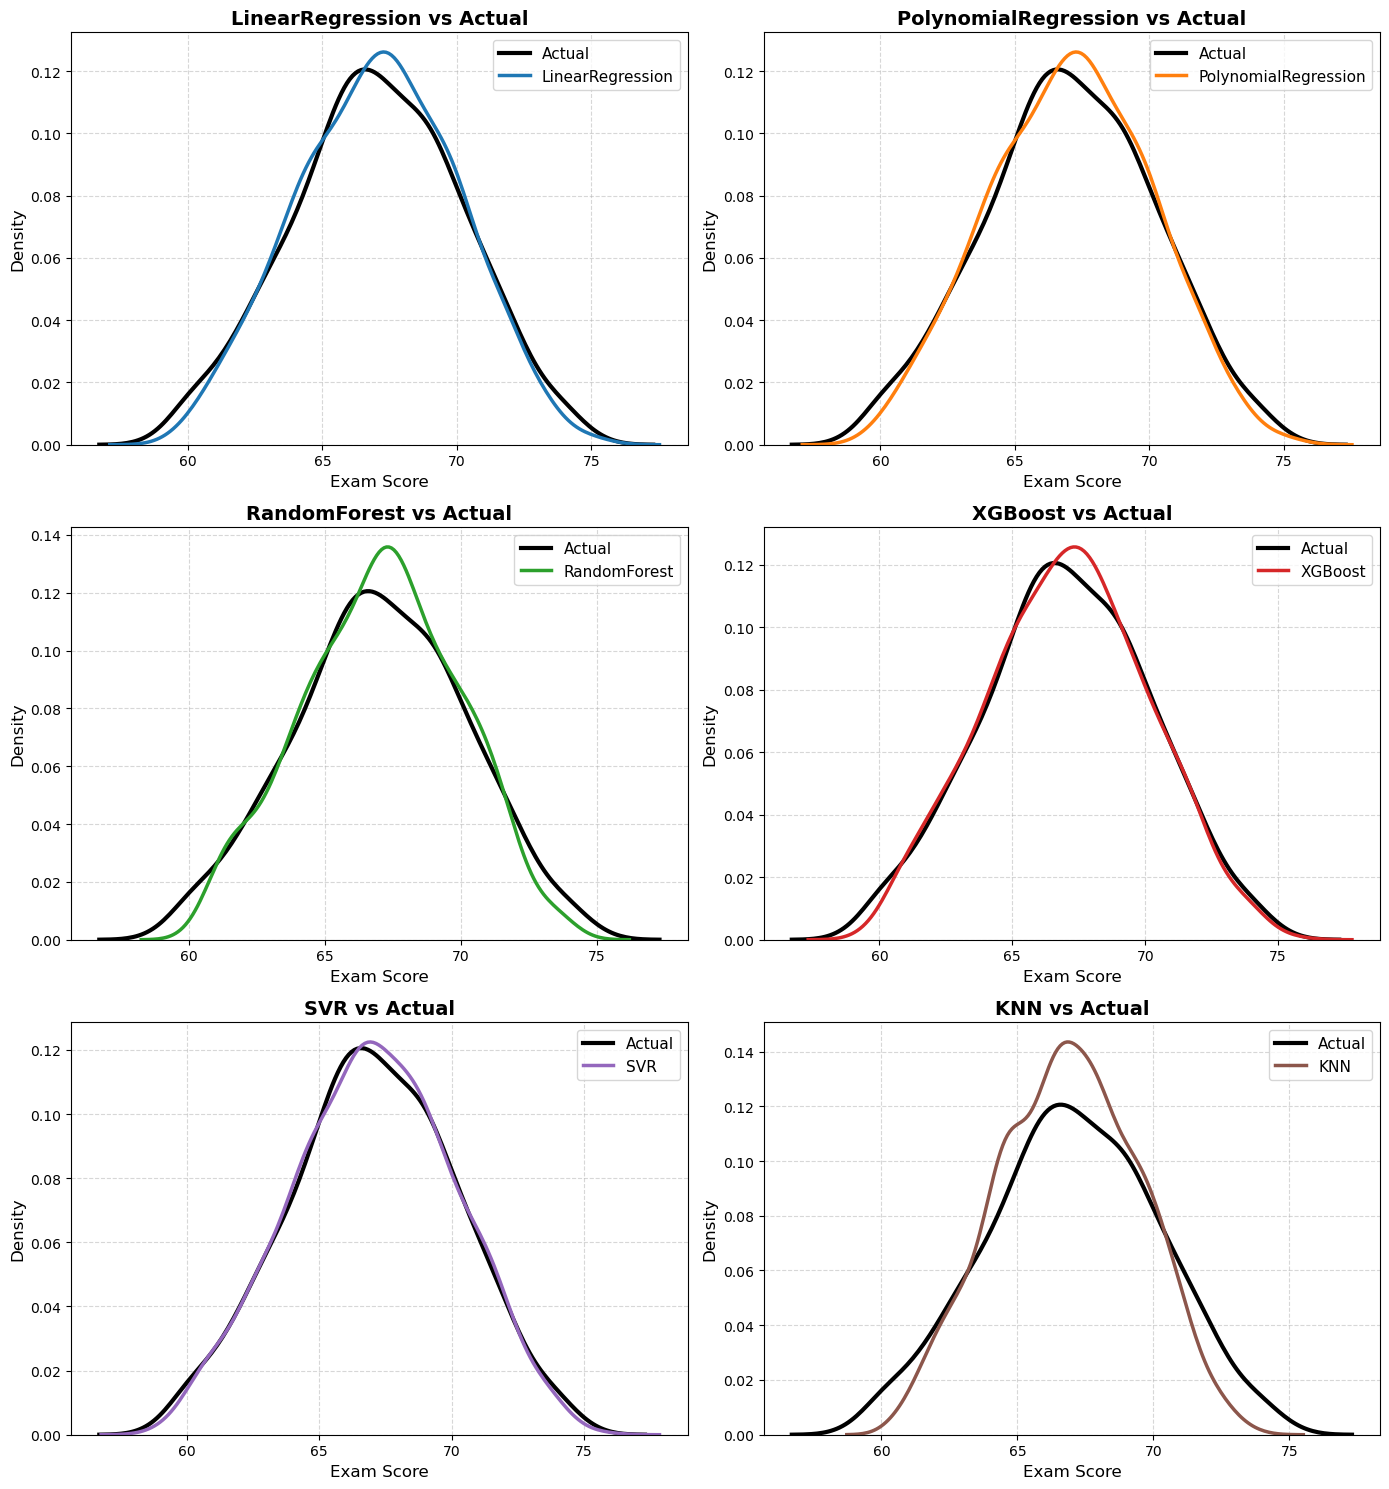

In [29]:
best_model_name = results_df.loc[results_df["Test R²"].idxmax(), "Model"]
print("\n🔥 Best Model is:", best_model_name)

best_model = best_models[best_model_name]

num_models = len(best_models)
cols = 2
rows = (num_models + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
axes = axes.flatten()

colors = sns.color_palette("tab10", n_colors=num_models)

for i, (name, grid) in enumerate(best_models.items()):
    ax = axes[i]
    y_pred = grid.predict(x_test)

    # KDE for actual
    sns.kdeplot(y_test, label='Actual', color='black', linewidth=3, ax=ax)

    # KDE for predicted
    sns.kdeplot(y_pred, label=f'{name}', linewidth=2.5, ax=ax, color=colors[i])

    ax.set_title(f"{name} vs Actual", fontsize=14, fontweight='bold')
    ax.set_xlabel("Exam Score", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

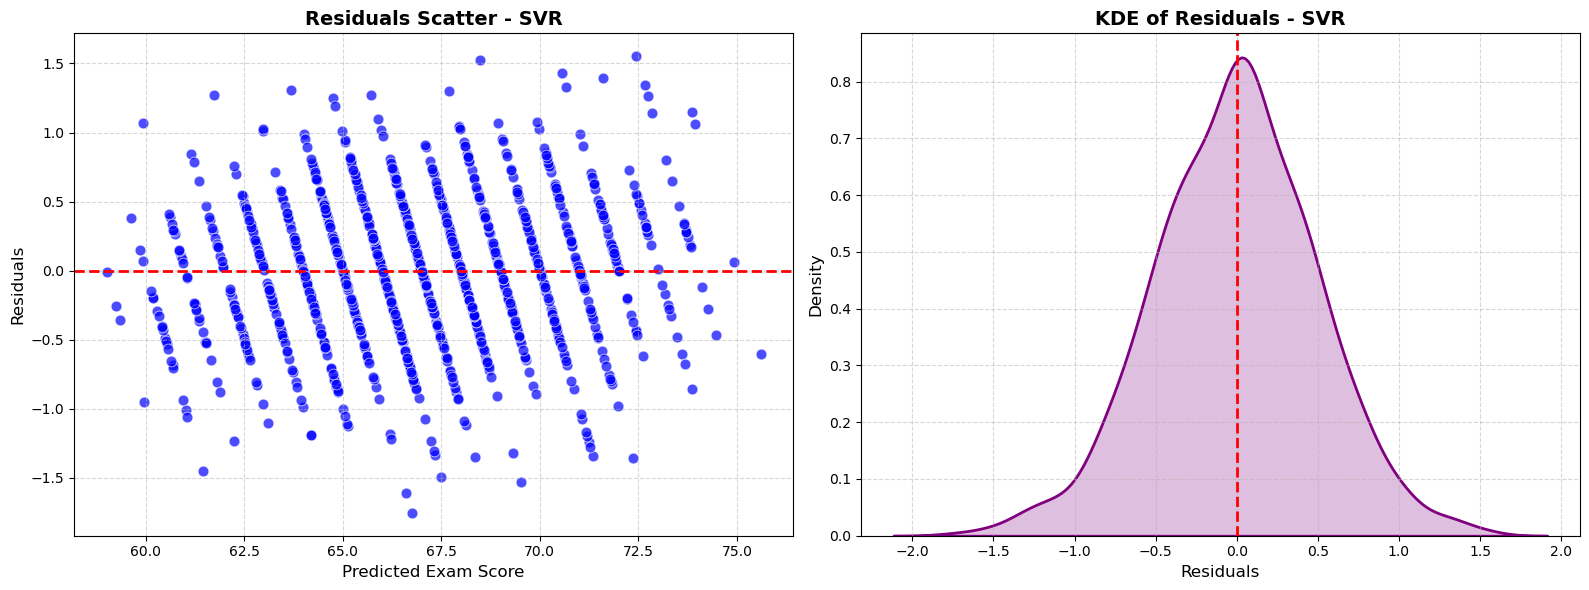

In [30]:
# Get best model (already selected)
best_model_name = results_df.loc[results_df["Test R²"].idxmax(), "Model"]
best_model = best_models[best_model_name]

# Predict on test set
y_pred = best_model.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Scatter plot of residuals
sns.scatterplot(x=y_pred, y=residuals, color='blue', s=60, alpha=0.7, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Predicted Exam Score", fontsize=12)
axes[0].set_ylabel("Residuals", fontsize=12)
axes[0].set_title(f"Residuals Scatter - {best_model_name}", fontsize=14, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.5)

# KDE of residuals
sns.kdeplot(residuals, fill=True, color='purple', linewidth=2, ax=axes[1])
axes[1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel("Residuals", fontsize=12)
axes[1].set_ylabel("Density", fontsize=12)
axes[1].set_title(f"KDE of Residuals - {best_model_name}", fontsize=14, fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model.best_estimator_.named_steps['regressor'])
])

In [34]:
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Attendance',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Parental_Education_Level',
                                                   'Motivation_Level',
                                                   'Peer_Influence',
                                                   'Family_Income',
                                                   'Distance_from_Home',
                                                   'Teacher_Quality']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Learning_Disabilities'])])),
                ('model', SVR(C=10))])

In [35]:
with open("student_pipeline.pkl", "wb") as f:
    joblib.dump(full_pipeline, f)